# Trash Classifier
### Tugas Akhir Data Science & Analytics (DSA B tapi A)

**1. Fajrin Maulana Kingwijati**

**2. Azhar Kurnia**

**3. Raden Fikri Ihza Dwi Nanda**

**4. Izzan Fakhril Islam**

**5. Mochamad Aulia Akbar Praditomo**

---------------------------------------------------------------------------------------------------------

**Step 1: Mengimport library yang dibutuhkan, seperti:**

- `InceptionV3` dari `keras.applications.inception_v3` untuk mengimplementasikan *Convolutional Neural Network* dengan *inception blocks*
- `image` dari `keras.preprocessing` untuk melakukan *preprocessing* dari tipe data yang akan kami olah, yaitu image (foto)
- `Dense` , `GlobalAveragePooling2D` , `Dropout` , `Input` dari `keras.layers` sebagai layer-layer pada CNN yang akan kami susun

In [0]:
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.preprocessing import image
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,Input
from keras.models import Sequential,Model
from keras import backend as K
from IPython.display import display

Using TensorFlow backend.


In [0]:
base_model  = InceptionV3(weights = 'imagenet', include_top=False)
print('loaded model')

Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 1s 0us/step
loaded model


**Step 2: Melakukan *linking* dengan dataset yang sudah disimpan di Google Drive**

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


**Step 3: Melakukan *preprocessing* dataset dengan parameter-parameter yang sudah ditentukan**

- `rotation_range` = 30
- `width_shift_range` = 0.2
- `shear_range` = 0.2,
- `zoom_range` = 0.2
- `horizontal_flip` = True
- `vertical_flip` = True

Selanjutnya, parameter-parameter yang sudah didefinisikan diatas ditempatkan pada data generator untuk `train_datagen` (data training) dan `test_datagen` (data testing). Data generator tersebut diarahkan pada folder dataset yang sudah disiapkan di Google Drive.

In [0]:
data_gen_args = dict(preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True)

train_datagen = image.ImageDataGenerator(**data_gen_args)
test_datagen = image.ImageDataGenerator(**data_gen_args)

In [0]:
train_generator = train_datagen.flow_from_directory("/gdrive/My Drive/DATASETS/train/",
                                                    target_size=(128,128),batch_size=32)

valid_generator = test_datagen.flow_from_directory("/gdrive/My Drive/DATASETS/valid/",
                                                   target_size=(128,128),batch_size=32)

Found 354 images belonging to 5 classes.
Found 75 images belonging to 5 classes.


**Step 4: Membangun arsitektur CNN LeNet**

In [0]:
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.layers.core import Activation, Flatten, Dense

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
        
        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
 
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
 
        # return the constructed network architecture
        return model 

model = LeNet.build(width=128, height=128, depth=3, classes=5)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])

**Step 5: Melakukan *training* pada data training**

- Menyimpan *benchmark* pada setiap *epoch* dengan menggunakan `ModelCheckpoint` dan `EarlyStopping`
- Melakukan *training* dengan 13 steps per *epoch*
- Menampilkan hasil output pada setiap layer CNN setelah dilakukan *fitting*

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Save the model with best weights
checkpointer = ModelCheckpoint('/gdrive/My Drive/DATASETS/saved_model/benchmark.hdf5', verbose=1,save_best_only=True)
# Stop the training if the model shows no improvement 
stopper = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=0,verbose=1,mode='auto')

In [0]:
history = model.fit_generator(train_generator, steps_per_epoch = 13,validation_data=valid_generator,validation_steps=3, epochs=10,verbose=1,callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 6/13 [============>.................] - ETA: 1:08 - loss: 8.0712 - acc: 0.2865

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


13/13 [==============================] - 116s 9s/step - loss: 6.9405 - acc: 0.3066 - val_loss: 1.6492 - val_acc: 0.3200

Epoch 00001: val_loss improved from inf to 1.64923, saving model to /gdrive/My Drive/DATASETS/saved_model/benchmark.hdf5
Epoch 2/10
13/13 [==============================] - 43s 3s/step - loss: 1.4486 - acc: 0.4251 - val_loss: 1.1306 - val_acc: 0.6267

Epoch 00002: val_loss improved from 1.64923 to 1.13063, saving model to /gdrive/My Drive/DATASETS/saved_model/benchmark.hdf5
Epoch 3/10
13/13 [==============================] - 45s 3s/step - loss: 1.0422 - acc: 0.5608 - val_loss: 1.0098 - val_acc: 0.6800

Epoch 00003: val_loss improved from 1.13063 to 1.00979, saving model to /gdrive/My Drive/DATASETS/saved_model/benchmark.hdf5
Epoch 4/10
13/13 [==============================] - 44s 3s/step - loss: 0.9910 - acc: 0.6039 - val_loss: 0.8619 - val_acc: 0.6533

Epoch 00004: val_loss improved from 1.00979 to 0.86185, saving model to /gdrive/My Drive/DATASETS/saved_model/bench

**Step 6: Merancang *output layer* untuk 

In [0]:
# Define the output layers for Inceptionv3
last = base_model.output
x = GlobalAveragePooling2D()(last)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(5,activation='softmax')(x)

model = Model(input=base_model.input,output=preds)
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [0]:
#Load the weights for the common layers from the benchmark model
base_model.load_weights(filepath='/gdrive/My Drive/DATASETS/saved_model/benchmark.hdf5',by_name=True)

In [0]:
#Freeze the original layers of Inception3
for layer in base_model.layers:
    layer.trainable = False

In [0]:
#Compile the model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Save the model with best weights
checkpointer = ModelCheckpoint('/gdrive/My Drive/DATASETS/saved_model/transfer_learning.hdf5', verbose=1,save_best_only=True)
# Stop the traning if the model shows no improvement
stopper = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=1,verbose=1,mode='auto')

In [0]:
# Train the model
history_transfer = model.fit_generator(train_generator, steps_per_epoch = 13,validation_data=valid_generator,validation_steps=4, epochs=5,verbose=1,callbacks=[checkpointer])

Epoch 1/5
 8/13 [=================>............] - ETA: 21s - loss: 1.8721 - acc: 0.3086

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


13/13 [==============================] - 59s 5s/step - loss: 1.7454 - acc: 0.3550 - val_loss: 3.1670 - val_acc: 0.4206

Epoch 00001: val_loss improved from inf to 3.16698, saving model to /gdrive/My Drive/DATASETS/saved_model/transfer_learning.hdf5
Epoch 2/5
13/13 [==============================] - 36s 3s/step - loss: 1.3844 - acc: 0.4907 - val_loss: 1.4737 - val_acc: 0.6744

Epoch 00002: val_loss improved from 3.16698 to 1.47369, saving model to /gdrive/My Drive/DATASETS/saved_model/transfer_learning.hdf5
Epoch 3/5
13/13 [==============================] - 39s 3s/step - loss: 1.1358 - acc: 0.5874 - val_loss: 1.3638 - val_acc: 0.6822

Epoch 00003: val_loss improved from 1.47369 to 1.36380, saving model to /gdrive/My Drive/DATASETS/saved_model/transfer_learning.hdf5
Epoch 4/5
13/13 [==============================] - 38s 3s/step - loss: 0.8946 - acc: 0.6958 - val_loss: 2.0199 - val_acc: 0.6168

Epoch 00004: val_loss did not improve from 1.36380
Epoch 5/5
13/13 [===========================

In [0]:
display(history_transfer.history)

{'acc': [0.344559585492228,
  0.5259067357512953,
  0.6295336787564767,
  0.7098445595854922,
  0.6839378238341969],
 'loss': [1.7620143686551504,
  1.381275652603782,
  1.067448958214083,
  0.872057948705446,
  0.8626700065296549],
 'val_acc': [0.42056074933470966,
  0.6744186067303946,
  0.6822429900971528,
  0.6168224315777003,
  0.7209302339442941],
 'val_loss': [3.1669806631926063,
  1.47368530825127,
  1.3638043737857142,
  2.0199111220992614,
  1.4625700781511706]}

**Step 6: Menampilkan akurasi dari data training dan data validasi pada setiap *epoch* nya, serta menampilkan rasio *data loss* antara data training dan data validasi pada setiap *epoch*nya**

[0.344559585492228, 0.5259067357512953, 0.6295336787564767, 0.7098445595854922, 0.6839378238341969]
[0.42056074933470966, 0.6744186067303946, 0.6822429900971528, 0.6168224315777003, 0.7209302339442941]


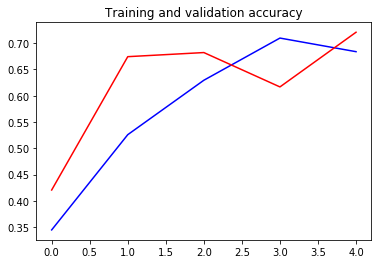

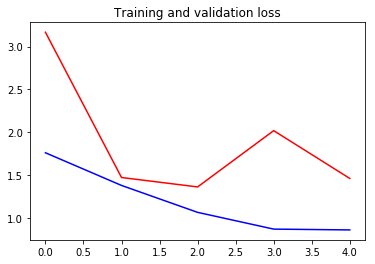

In [0]:
import matplotlib.pyplot as plt

def plot_training(history):
    acc = history.history['acc'] 
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs  = range(len(acc))
    print(acc)
    print(val_acc)
    
    plt.plot(epochs,acc,'b')
    plt.plot(epochs,val_acc,'r')
    plt.title("Training and validation accuracy")
    plt.show()
    
    plt.figure()
    plt.plot(epochs,loss,'b')
    plt.plot(epochs,val_loss,'r')
    plt.title("Training and validation loss")
    
    plt.show()

plot_training(history_transfer)

In [0]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [0]:
# Unfreeze the last three inception modules
for layer in model.layers[:229]:
    layer.trainable = False
for layer in model.layers[229:]:
    layer.trainable = True

In [0]:
from keras.optimizers import SGD

# Use an optimizer with slow learning rate
model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Save the model with best validation loss
checkpointer = ModelCheckpoint('/gdrive/My Drive/DATASETS/saved_model/fine_tuning.hdf5', verbose=1,save_best_only=True,monitor='val_loss')

# Stop the traning if the validation loss doesn't improve
stopper = EarlyStopping(monitor='val_loss,val_acc',min_delta=0.1,patience=2,verbose=1,mode='auto')

# Train the model
history = model.fit_generator(train_generator, steps_per_epoch = 13,validation_data=valid_generator,validation_steps=3, epochs=5,verbose=1,callbacks=[checkpointer])

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


13/13 [==============================] - 72s 6s/step - loss: 0.7843 - acc: 0.7079 - val_loss: 1.3451 - val_acc: 0.6000

Epoch 00001: val_loss improved from inf to 1.34511, saving model to /gdrive/My Drive/DATASETS/saved_model/fine_tuning.hdf5
Epoch 2/5
13/13 [==============================] - 54s 4s/step - loss: 0.8568 - acc: 0.6913 - val_loss: 0.7330 - val_acc: 0.7067

Epoch 00002: val_loss improved from 1.34511 to 0.73303, saving model to /gdrive/My Drive/DATASETS/saved_model/fine_tuning.hdf5
Epoch 3/5
13/13 [==============================] - 50s 4s/step - loss: 0.7262 - acc: 0.7171 - val_loss: 1.0098 - val_acc: 0.7067

Epoch 00003: val_loss did not improve from 0.73303
Epoch 4/5
13/13 [==============================] - 51s 4s/step - loss: 0.6631 - acc: 0.7659 - val_loss: 0.9828 - val_acc: 0.7200

Epoch 00004: val_loss did not improve from 0.73303
Epoch 5/5
13/13 [==============================] - 52s 4s/step - loss: 0.7256 - acc: 0.7538 - val_loss: 0.9621 - val_acc: 0.6933

Epoch 00

[0.7227979274611399, 0.7409326424870466, 0.7893258426966292, 0.7849740932642487, 0.772020725388601]
[0.6000000023841858, 0.7066666686534882, 0.706666665871938, 0.7199999992052714, 0.6933333317438761]


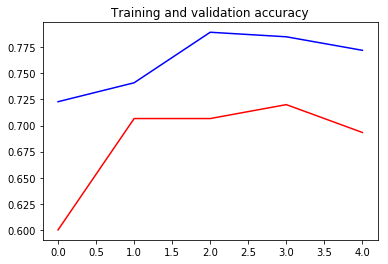

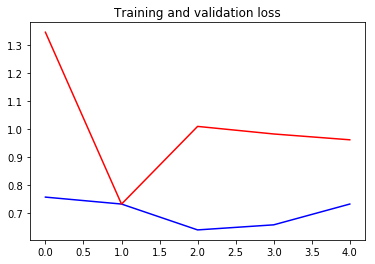

In [0]:
plot_training(history)

## Hasil Training Data
------------------------------------------------------------------------------------

In [0]:
model.load_weights('/gdrive/My Drive/DATASETS/saved_model/fine_tuning.hdf5')

In [0]:
from keras.preprocessing.image import img_to_array,load_img
import cv2

def pred(img_path):    
    img = load_img(img_path,target_size = (128,128)) #Load the image and set the target size to the size of input of our model
    x = img_to_array(img) #Convert the image to array
    x = np.expand_dims(x,axis=0) #Convert the array to the form (1,x,y,z) 
    x = preprocess_input(x) # Use the preprocess input function o subtract the mean of all the images
    p = np.argmax(model.predict(x)) # Store the argmax of the predictions
    print(max(model.predict(x)))
    if p==0:     
        print("Kaca")
    elif p==1:
        print("Kardus")
    elif p==2:
        print("Kertas")
    elif p==3:
        print("Logam")
    elif p==4:
        print("Plastik")

[0.9833292  0.00875038 0.00159252 0.00349328 0.0028347 ]
Kaca


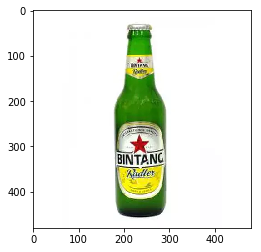

In [0]:
pred("/gdrive/My Drive/DATASETS/test/kaca/kaca003.jpg")
z = plt.imread("/gdrive/My Drive/DATASETS/test/kaca/kaca003.jpg") 
plt.imshow(z);

[4.6520217e-08 9.9927372e-01 2.8951154e-05 2.4820240e-05 6.7259296e-04]
Kardus


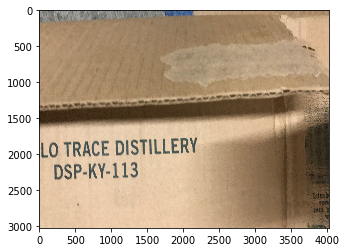

In [0]:
pred("/gdrive/My Drive/DATASETS/test/kardus/cardboard11.jpg")
z = plt.imread("/gdrive/My Drive/DATASETS/test/kardus/cardboard11.jpg") 
plt.imshow(z);

[0.07279073 0.02074904 0.7931922  0.00892469 0.10434332]
Kertas


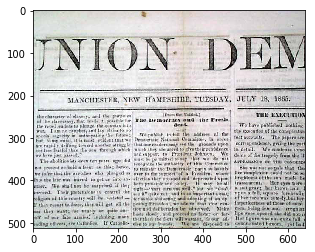

In [0]:
pred("/gdrive/My Drive/DATASETS/test/kertas/kertas087.jpg")
z = plt.imread("/gdrive/My Drive/DATASETS/test/kertas/kertas087.jpg") 
plt.imshow(z);

[3.9093932e-03 8.5777789e-04 3.6427286e-05 9.8501343e-01 1.0182873e-02]
Logam


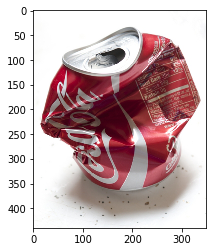

In [0]:
pred("/gdrive/My Drive/DATASETS/test/logam/metal004.JPG")
z = plt.imread("/gdrive/My Drive/DATASETS/test/logam/metal004.JPG") 
plt.imshow(z);

[1.2258220e-03 3.7712161e-05 9.4045703e-07 5.3842628e-04 9.9819714e-01]
Plastik


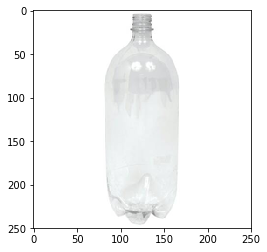

In [0]:
pred("/gdrive/My Drive/DATASETS/test/plastik/plastik008.jpg")
z = plt.imread("/gdrive/My Drive/DATASETS/test/plastik/plastik008.jpg") 
plt.imshow(z);